Simulation of binomial distribution on the titanic dataset.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom

If we picked 100ppl randomly from titanic data, what is P distributino of the no of survivors.?
we are studyinf the titantic disaster and want to understand the likelihood of Survival. We look at real passenger data and calc the overall survival rate- that is , the P that a randomly chosen person survived. Now, suppose we randmly select 100 passng - what are the changces that 50 of them surv? or 60? or 70? 

That is exactly what the binomial distrb, helps us expolore. It shows us how many surv we might expect out of 100 random passengers, and how likely each outcome is, based on what actually happended in the real data.

In [3]:
titanic_df = pd.read_csv('titanic.csv')

In [4]:
titanic_df['survival_binary'] = titanic_df['survived'].apply(lambda x: 1 if x ==1 else 0)
n = len(titanic_df)
k = titanic_df['survival_binary'].sum() 
p = k / n
print(n,k,p)

891 342 0.3838383838383838


In [5]:
#simulate 100 hypothetical passengers
trials = 100
x = np.arange(0, trials + 1 )   #From 0 to 100 survivors


In [7]:
#PMF and CMF
pmf_values = binom.pmf(x, trials, p)
cdf_values = binom.cdf(x, trials, p)
print("Pmf values: ",pmf_values)
print("Cmf values: ",cdf_values)

Pmf values:  [9.32103291e-22 5.80654509e-20 1.79051005e-18 3.64363903e-17
 5.50428421e-16 6.58348486e-15 6.49354654e-14 5.43207219e-13
 3.93379982e-12 2.50502079e-11 1.42005933e-10 7.23785828e-10
 3.34404873e-09 1.41015119e-08 5.45896937e-08 1.94971715e-07
 6.45244507e-07 1.98613352e-06 5.70515950e-06 1.53384616e-05
 3.86981843e-05 9.18364405e-05 2.05434422e-04 4.34004011e-04
 8.67415120e-04 1.64268516e-03 2.95186173e-03 5.03985135e-03
 8.18533235e-03 1.26597339e-02 1.86644602e-02 2.62546082e-02
 3.52661796e-02 4.52696514e-02 5.55720985e-02 6.52809476e-02
 7.34262025e-02 7.91194171e-02 8.17134963e-02 8.09234962e-02
 7.68773214e-02 7.00840834e-02 6.13304118e-02 5.15334455e-02
 4.15877210e-02 3.22399527e-02 2.40133646e-02 1.71871030e-02
 1.18220032e-02 7.81541597e-03 4.96599218e-03 3.03291069e-03
 1.78035299e-03 1.00444289e-03 5.44606861e-04 2.83747479e-04
 1.42039868e-04 6.83033246e-05 3.15454020e-05 1.39890141e-05
 5.95488632e-06 2.43252545e-06 9.53200084e-07 3.58163133e-07
 1.28990104

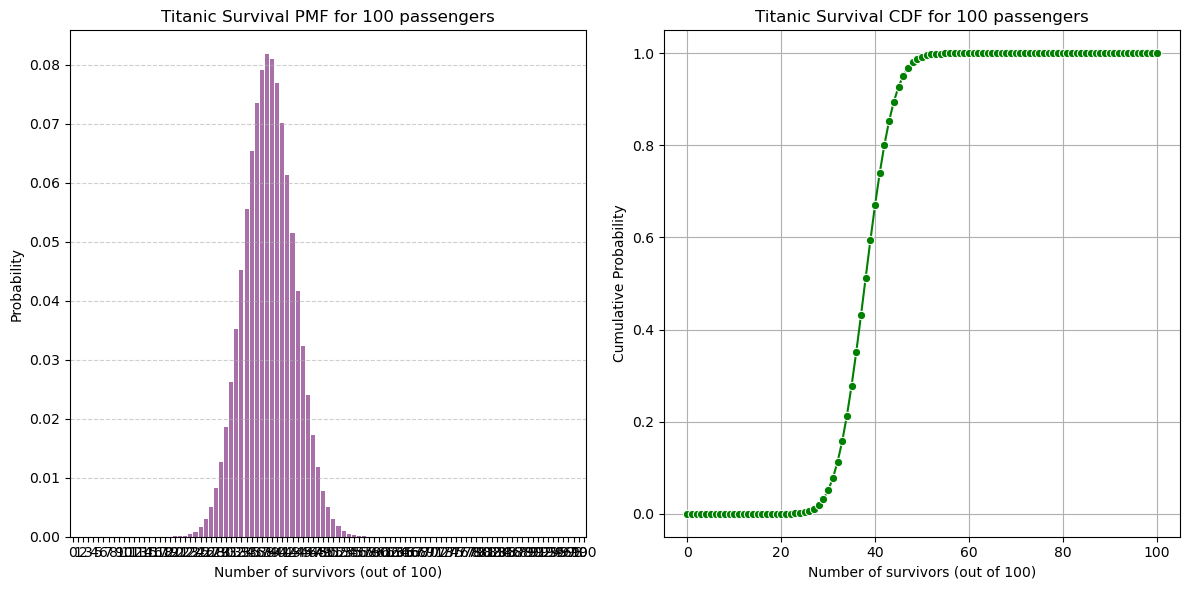

In [28]:
plt.figure(figsize=(12,6))

#Plot PMF
plt.subplot(1,2,1)
sns.barplot(x=x, y=pmf_values, color='purple', alpha=0.6)
plt.title(f'Titanic Survival PMF for {trials} passengers')
plt.xlabel('Number of survivors (out of 100)')
plt.ylabel('Probability')
plt.grid(axis='y', linestyle='--', alpha=0.6)

#Plot CDF
plt.subplot(1,2,2)
sns.lineplot(x=x, y=cdf_values, color='green', marker='o', linestyle='-')
plt.title(f'Titanic Survival CDF for {trials} passengers')
plt.xlabel('Number of survivors (out of 100)')
plt.ylabel('Cumulative Probability')
plt.grid()
plt.tight_layout()
plt.show()